In this assignment students have to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.
***
Hint:

import numpy as np

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition

from sklearn import datasets
***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition

In [2]:
from sklearn.datasets import load_iris

In [3]:
data=load_iris()
col=data.feature_names
target=data.target
target_name=data.target_names

In [4]:
col

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
len(target)

150

In [6]:
len(data.data)

150

In [7]:
df=pd.DataFrame(data.data,columns=col)

In [8]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [12]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

<IPython.core.display.Javascript object>


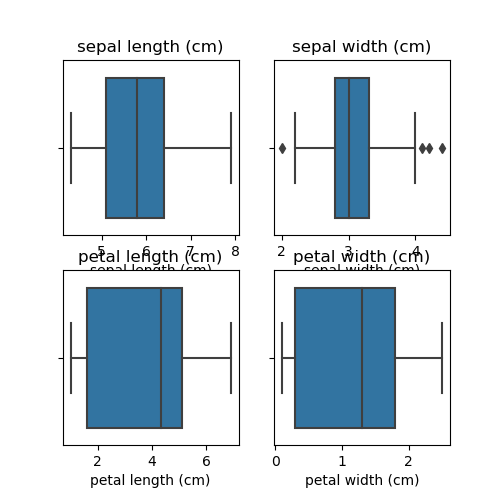

In [78]:
plt.figure(figsize=(5,5))
counter=1
for i in df.columns:
    plt.subplot(2,2,counter)
    sns.boxplot(df[i])
    plt.title(i)
    counter+=1
#sns.violinplot(df=df,ax=ax)
#sns.boxplot(df['sepal length (cm)'])

In [19]:
#Let's scale the data before going to PCA
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
std.fit(df)
df_scaled=std.fit_transform(df)

<IPython.core.display.Javascript object>


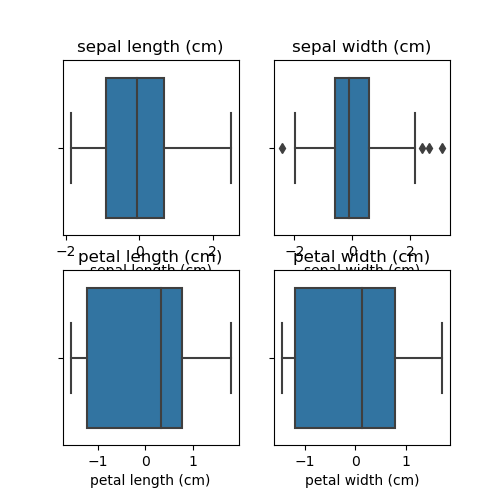

In [79]:
plt.figure(figsize=(5,5))
counter=1
df_scaled_df=pd.DataFrame(df_scaled,columns=df.columns)
for i in df.columns:
    plt.subplot(2,2,counter)
    sns.boxplot(df_scaled_df[i])
    plt.title(i)
    counter+=1

My data has 4 dimensions, now i need to reduce it to 3 dimensions

In [20]:
pca=decomposition.PCA(n_components=3)

In [22]:
pca.fit(df_scaled)
df_pca=pca.fit_transform(df_scaled)

In [23]:
df_pca.shape

(150, 3)

In [24]:
df_pca

array([[-2.26470281,  0.4800266 , -0.12770602],
       [-2.08096115, -0.67413356, -0.23460885],
       [-2.36422905, -0.34190802,  0.04420148],
       [-2.29938422, -0.59739451,  0.09129011],
       [-2.38984217,  0.64683538,  0.0157382 ],
       [-2.07563095,  1.48917752,  0.02696829],
       [-2.44402884,  0.0476442 ,  0.3354704 ],
       [-2.23284716,  0.22314807, -0.0886955 ],
       [-2.33464048, -1.11532768,  0.14507686],
       [-2.18432817, -0.46901356, -0.25376557],
       [-2.1663101 ,  1.04369065, -0.2686811 ],
       [-2.32613087,  0.13307834,  0.09375924],
       [-2.2184509 , -0.72867617, -0.23091124],
       [-2.6331007 , -0.96150673,  0.18079608],
       [-2.1987406 ,  1.86005711, -0.472901  ],
       [-2.26221453,  2.68628449,  0.03052661],
       [-2.2075877 ,  1.48360936, -0.00534409],
       [-2.19034951,  0.48883832, -0.04421532],
       [-1.898572  ,  1.40501879, -0.37434327],
       [-2.34336905,  1.12784938,  0.13263047],
       [-1.914323  ,  0.40885571, -0.421

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
list(data.target_names)

['setosa', 'versicolor', 'virginica']

<IPython.core.display.Javascript object>


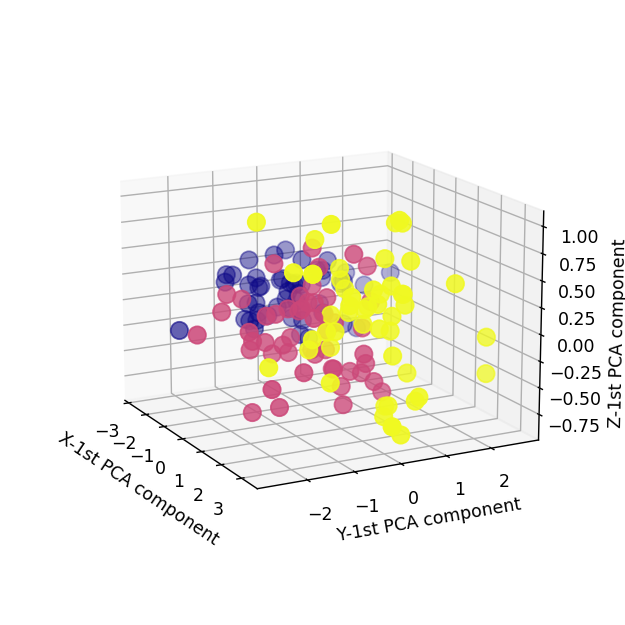

Text(0.5, 0, 'Z-1st PCA component')

In [76]:
%matplotlib notebook
fig=plt.figure(figsize=(5,5))
x,y,z=df_pca[:,0],df_pca[:,1],df_pca[:,2]
#ax=fig.add_subplot(111,projection='3d')
ax=plt.axes(projection='3d')
ax.scatter3D(x,y,z,c=target,s=100,cmap='plasma')
ax.set_xlabel('X-1st PCA component')
ax.set_ylabel('Y-1st PCA component')
ax.set_zlabel('Z-1st PCA component')